In [ ]:
%pylab inline

### Selecciono las particulas del extremo de la barra en z=0

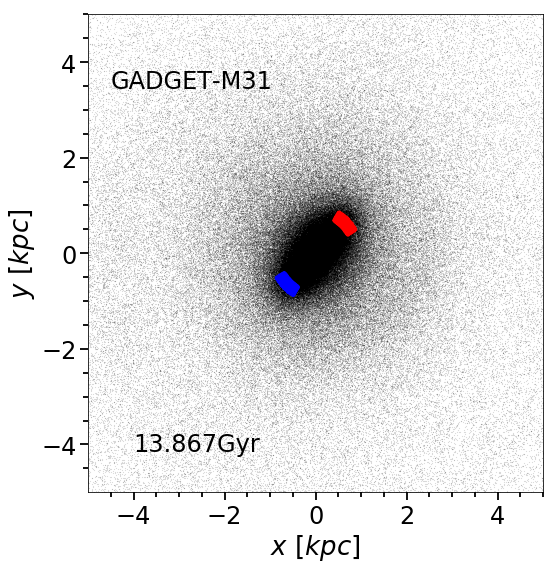

In [15]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import math
import numpy as np

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]


path = '/mnt/is2/alejandro/ornella/'

snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')
#print isnap
cm   = snap['subhalo_000/Center'][()]
r200 = snap['subhalo_000/R200'][()]

pstr = snap['subhalo_000/Str/Coordinates'][()]
IDs = snap['subhalo_000/Str/Ids'][()]
masa_str = snap['subhalo_000/Str/Masses'][()]
vel  = snap['subhalo_000/Str/Velocities'][()]

z = a0/aexp[0] - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
t = tiempo.conv(z, h, omega_lambda, omega_matter)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp[0]/h
ystr = (pstr[:,1]-cm[1])*aexp[0]/h
zstr = (pstr[:,2]-cm[2])*aexp[0]/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.

#----------------------masas----------------------------
masa_str = masa_str/h

r200 = r200*aexp[0]/h
rgal=0.15*r200

limit = np.where(r<rgal)
r_sort = np.sort(r[limit])
r_indice = np.argsort(r[limit])

Mc_str = np.cumsum((masa_str[limit])[r_indice])
M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
razon = Mc_str/M_gal
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa]
r50 = r_sort[cincuenta]
M90 = Mc_str[noventa]                

#------------------masa total en r200 (Mvir)--------------------------         
corte,=np.where(r<r90[-1])
veloc,=np.where(r<r50[-1])

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,3*aexp[0])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr

Rcirc = np.sqrt(xn**2+yn**2)
tita = np.arctan2(yn,xn)*180/np.pi
mask, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < 60) & (tita > 30) & (zn<0.5) & (zn>-0.5))
mask2, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < -120) & (tita > -150)& (zn<0.5) & (zn>-0.5))

IDred = IDs[mask]
IDblue = IDs[mask2]

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(xn,yn,'.', markersize=0.1, color='k')
ax1.plot(xn[mask],yn[mask],'.', markersize=5, color='r')
ax1.plot(xn[mask2],yn[mask2],'.', markersize=5, color='b')
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=5, width=1.8,which='minor')
ax1.tick_params('both', length=8, width=1.8,which='major')
plt.text(-4.5, 3.6,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
#plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
#              ha='center', va='center', 
#             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
#plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
plt.text(-4, -4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')

#fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
#fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/starGD_'+str('%s'%vector2[i])+'.png', dpi = 100)
plt.show()
#plt.clf()



array([    0,     1,     2, ..., 77996, 77997, 77998])

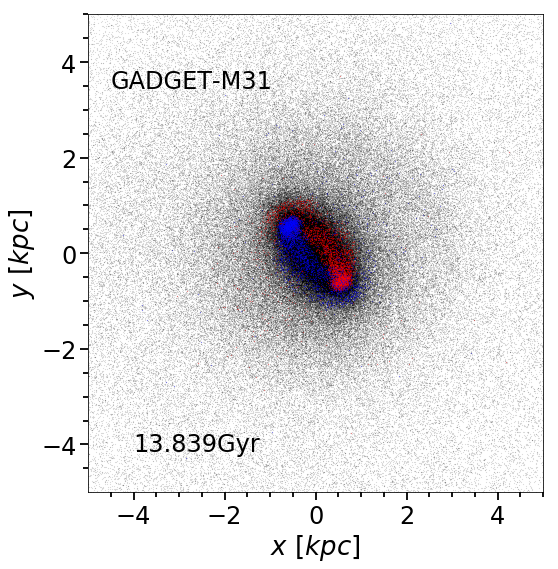

In [17]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/mnt/is2/alejandro/ornella/'

snap = h5py.File(path + 'outputs_1/snap_495.h5py', 'r')
#print isnap
cm   = snap['subhalo_000/Center'][()]
r200 = snap['subhalo_000/R200'][()]
aexp = snap['subhalo_000/Time'][()]

pstr = snap['subhalo_000/Str/Coordinates'][()]
IDs = snap['subhalo_000/Str/Ids'][()]

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
t = tiempo.conv(z, h, omega_lambda, omega_matter)
#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr

#print 'Red is the best'
    
fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(xn,yn,'.', markersize=0.1, color='k')
# for ii in IDred:
#     aux = np.where(ii == IDs)
#     ax.plot(xn[aux],yn[aux],'.', markersize=0.1, color='r')

mask_red = np.isin(IDs, IDred)
ax.plot(xn[mask_red], yn[mask_red], '.', markersize=0.3, color='r')

#print 'I am blue'
# for ii in IDblue:
#     aux = np.where(ii == IDs)
#     ax.plot(xn[aux],yn[aux],'.', markersize=0.1, color='b')
mask_blue = np.isin(IDs, IDblue)
ax.plot(xn[mask_blue], yn[mask_blue], '.', markersize=0.3, color='b')
#print 'finish him!'
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=5, width=1.8,which='minor')
ax.tick_params('both', length=8, width=1.8,which='major')
plt.text(-4.5, 3.6,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
#plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
#              ha='center', va='center', 
#             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
#plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
plt.text(-4, -4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')

#fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
#fig.savefig('/home/ornela/Escritorio/barra495.png', dpi = 100)
plt.show()
#plt.clf()

#from IPython.display import Image
#Image(filename='/home/ornela/Escritorio/barra495.png') 

In [5]:
array = np.array([1,2,3,4])
m = np.where(2==array)
print m
print array[m]


(array([1]),)
[2]


In [23]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import math

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')

snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp/h
    ystr = (pstr[:,1]-cm[1])*aexp/h
    zstr = (pstr[:,2]-cm[2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    corte,=np.where(r<r90[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    if isnap == 497:
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
        
    Rcirc = np.sqrt(xn**2+yn**2)
    tita = arctan2(yn,xn)*180/pi
    mask, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < 50) & (tita > 40) & (zn<0.5) & (zn>-0.5))
    mask2, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < -130) & (tita > -140)& (zn<0.5) & (zn>-0.5))
    IDred = IDs[mask]
    IDblue = IDs[mask2]
    
    VR = (vxn*xn + vyn*yn)/Rcirc
    VRred = sum(VR[mask])/len(vxn[mask])
    VRblue = sum(VR[mask2])/len(vxn[mask2])
    
    print 'VR_red=', VRred, 'VR_blue=', VRblue

    VT = (vyn*xn - vxn*yn)/Rcirc

    VTred = sum(VT[mask])/len(vxn[mask])
    VTblue = sum(VT[mask2])/len(vxn[mask2])
    print 'VT_red=', VTred, 'VT_blue=', VTblue
    
    VZred = sum(vzn[mask])/len(vzn[mask])
    VZblue = sum(vzn[mask2])/len(vzn[mask2])
    print 'VZ_red=', VZred, 'VZ_blue=', VZblue
    

    
    
    
#     fig=plt.figure(1,figsize=(8,8))
#     fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
#     ax1=fig.add_subplot(111)
#     ax1.plot(xn,yn,'.', markersize=0.1, color='k')
#     ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
#     ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
#     ax1.set_xlim(-5,5)
#     ax1.set_ylim(-5,5)
#     plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
#     plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
#     ax1.minorticks_on()
#     ax1.tick_params( labelsize=24)
#     ax1.tick_params('both', length=5, width=1.8,which='minor')
#     ax1.tick_params('both', length=8, width=1.8,which='major')
#     plt.text(-4.5, 3.6,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
#     #plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
#     #              ha='center', va='center', 
#     #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
#     #plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
#     plt.text(-4, -4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')

#     #fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
#     #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/starGD_'+str('%s'%vector2[i])+'.png', dpi = 100)
#     plt.show()
#     #plt.clf()



VR_red= 3.09404559627 VR_blue= -0.508139070502
VT_red= 76.3619090994 VT_blue= 74.898010717
VZ_red= 5.4064678654 VZ_blue= -4.83071496526


In [19]:
print vyn[mask]

[ -63.13097     233.73690796    1.14881134 ...,   54.48734283   62.04452515
   71.28019714]


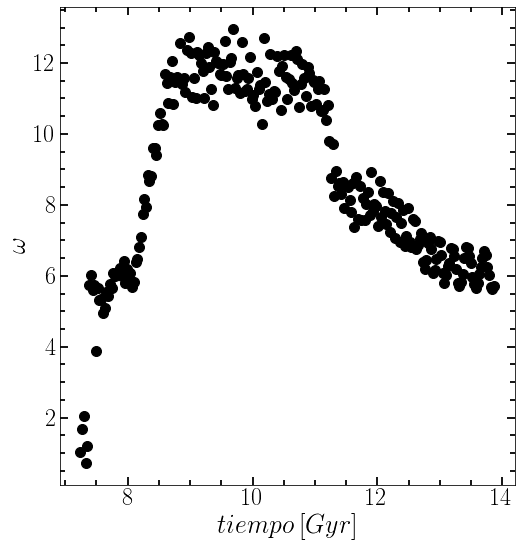

In [17]:
#provando elipsoide

import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import barstrength as strng
import math
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

vector = ('00','01','03')

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)

snapshot=range(496,250,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    #aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    #corte1,=np.where(r<r90[-1])
    corte2,=np.where(r<1.2*r50[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,1.2*r50[-1])

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    
    A2max, rmax, phi = strng.a2max(masa_str[corte2], xn[corte2], yn[corte2], 20)

#     if phi < 0:
#         phi2= phi + 2*pi
#     else: 
#         phi2= phi
#     phi2 = phi2/2.
    
    aa=1.
    bb=0.75
    cc=0.5
    
    xx = xn*cos(phi/2)-yn*sin(phi/2)
    yy = xn*sin(phi/2)+yn*cos(phi/2)
    zz = zn
    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2)
    mask, = np.where(RR<1)
    
    #print len(xn[mask])
    
    Lz = (xn*vyn-yn*vxn)*masa_str/sum(masa_str)
    Lz = sum(Lz[mask])

    
    ax1.plot(t,Lz,'o', markersize=10, color='k')
#     ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
#     ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
#     ax1.set_xlim(-5,5)
#     ax1.set_ylim(-5,5)
    plt.xlabel(r'$tiempo\:[Gyr]$', fontsize=26)
    plt.ylabel(r'$\omega$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
#     plt.text(-4.5, 3.6,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
#     #plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
#     #              ha='center', va='center', 
#     #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
#     #plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
#     plt.text(-4, -4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')

#     #fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
#     #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/starGD_'+str('%s'%vector2[i])+'.png', dpi = 100)
plt.show()
#     #plt.clf()



In [16]:
len(xn[mask])

36949

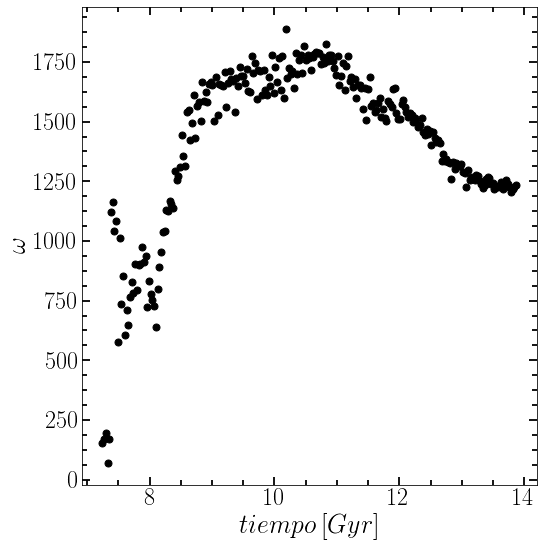

In [7]:
#provando elipsoide

import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import barstrength as strng
import math
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

vector = ('00','01','03')

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)

snapshot=range(496,250,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    #aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    #corte1,=np.where(r<r90[-1])
    corte2,=np.where(r<1.2*r50[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,1.2*r50[-1])

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    
    A2max, rmax, phi = strng.a2max(masa_str[corte2], xn[corte2], yn[corte2], 20)

    if phi < 0:
        phi2= phi + 2.*pi
    else: 
        phi2= phi
    phi2 = phi/2.
    
    aa=1.
    bb=0.5
    cc=0.5
    
    xx = xn*cos(phi2)+yn*sin(phi2)
    yy = xn*sin(phi2)-yn*cos(phi2)
    zz = zn
    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2)
    mask, = np.where(RR<1)
    
    #print len(xn[mask])
    
    Lz = (xn[mask]*vyn[mask] - yn[mask]*vxn[mask])*masa_str[mask]
    Izz = masa_str[mask]*zn[mask]**2
    omega = sum(Lz)/sum(Izz)
    #omega = sum(Omega[mask])
    
    ax1.plot(t,omega,'o', markersize=7, color='k')
#     ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
#     ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
#     ax1.set_xlim(-5,5)
    #ax1.set_ylim(1200000,1220000)
    plt.xlabel(r'$tiempo\:[Gyr]$', fontsize=26)
    plt.ylabel(r'$\omega$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
#     plt.text(-4.5, 3.6,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
#     #plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
#     #              ha='center', va='center', 
#     #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
#     #plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
#     plt.text(-4, -4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')

#     #fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
#     #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/starGD_'+str('%s'%vector2[i])+'.png', dpi = 100)
plt.show()
#     #plt.clf()



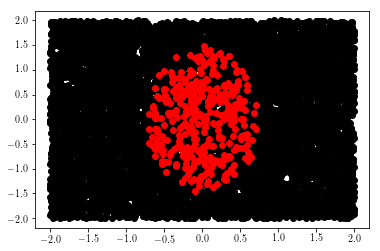

In [27]:
xn = np.random.rand(10000)*4 - 2
yn = np.random.rand(10000)*4 - 2
zn = np.random.rand(10000)*4 - 2
xx = xn*cos(pi/2)-yn*sin(pi/4)
yy = xn*sin(pi/2)+yn*cos(pi/2)
zz = zn
RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2)
mask, = np.where(RR<1)

plot(xn,yn,'ko')
plot(xn[mask],yn[mask],'ro')

TypeError: object of type 'numpy.float32' has no len()

In [ ]:
 ax.annotate(" ", xy=v, xytext=[0, 0],
                   arrowprops=dict(facecolor="blue",
                                  shrink=0,
                                  alpha=0.7,
                                  width=0.5))

VR_red_inside= 6.91957061837 VR_blue_inside= -2.78153762744
VR_red= 2.53457796862 VR_blue= 1.63046847374
55.8003
VT_red_inside= 56.3277263829 VT_blue_inside= 50.7298448088
VT_red= 77.7877484709 VT_blue= 75.6986209335


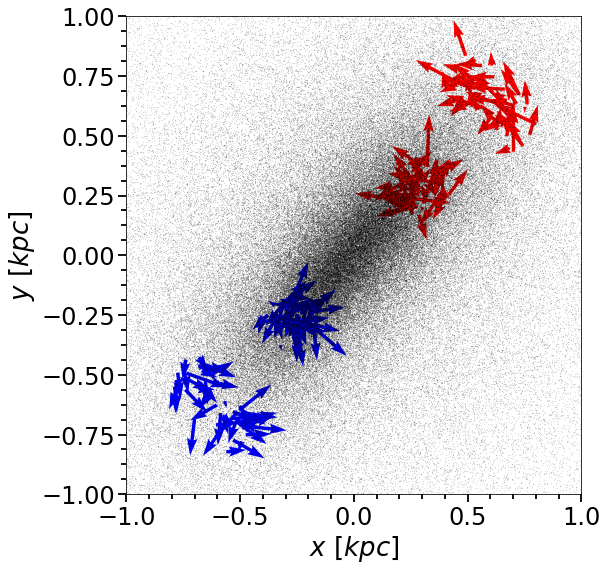

In [4]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import math

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')

snapshot=range(496,495,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp/h
    ystr = (pstr[:,1]-cm[1])*aexp/h
    zstr = (pstr[:,2]-cm[2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    corte,=np.where(r<r90[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    if isnap == 496:
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    Rcirc = np.sqrt(xn**2+yn**2)
    tita = arctan2(yn,xn)*180/pi
    mask, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < 60) & (tita > 30) & (zn<0.5) & (zn>-0.5))
    mask2, = np.where((Rcirc<1) & (Rcirc>0.8) & (tita < -120) & (tita > -150)& (zn<0.5) & (zn>-0.5))
    
    mask3, = np.where((Rcirc<0.5) & (Rcirc>0.3) & (tita < 60) & (tita > 30) & (zn<0.5) & (zn>-0.5))
    mask4, = np.where((Rcirc<0.5) & (Rcirc>0.3) & (tita < -120) & (tita > -150)& (zn<0.5) & (zn>-0.5))

    IDred = IDs[mask]
    IDblue = IDs[mask2]
    
    #IDred2 = IDs[mask3]
    #IDblue2 = IDs[mask4]

    VR = (vxn*xn + vyn*yn)/Rcirc
    VRred = sum(VR[mask3])/len(vxn[mask3])
    VRblue = sum(VR[mask4])/len(vxn[mask4])
    print 'VR_red_inside=', VRred, 'VR_blue_inside=', VRblue
    
    VRred = sum(VR[mask])/len(vxn[mask])
    VRblue = sum(VR[mask2])/len(vxn[mask2])
    print 'VR_red=', VRred, 'VR_blue=', VRblue

    VT = (vyn*xn - vxn*yn)/Rcirc
    
    qq = np.zeros(50)
    ww = np.zeros(50)
    vv = np.zeros(50)
    zz = np.zeros(50)
    for i in range(50):
        qq[i] = randint(0,len(xn[mask]))
        ww[i] = randint(0,len(xn[mask2]))
        vv[i] = randint(0,len(xn[mask3]))
        zz[i] = randint(0,len(xn[mask4]))
    
    qq = np.int_(qq)
    ww = np.int_(ww)
    vv = np.int_(vv)
    zz = np.int_(zz)
    #print qq
    print median(VT[mask3])
    VTred = sum(VT[mask3])/len(vxn[mask3])
    VTblue = sum(VT[mask4])/len(vxn[mask4])
    print 'VT_red_inside=', VTred, 'VT_blue_inside=', VTblue
    
    
    VTred = sum(VT[mask])/len(vxn[mask])
    VTblue = sum(VT[mask2])/len(vxn[mask2])
    print 'VT_red=', VTred, 'VT_blue=', VTblue
    
    #VZred = sum(vzn[mask])/len(vzn[mask])
    #VZblue = sum(vzn[mask2])/len(vzn[mask2])
    #print 'VZ_red=', VZred, 'VZ_blue=', VZblue
    

    fig=plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax1=fig.add_subplot(111)
    ax1.plot(xn,yn,'.', markersize=0.1, color='k')
    #ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
    #ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
    plt.quiver(xn[mask][qq], yn[mask][qq], vxn[mask][qq], vyn[mask][qq], color = 'r', lw=1)
    plt.quiver(xn[mask2][ww], yn[mask2][ww], vxn[mask2][ww], vyn[mask2][ww], color = 'b', lw=1) 
    plt.quiver(xn[mask3][qq], yn[mask3][qq], vxn[mask3][vv], vyn[mask3][vv], color = 'r', lw=1)
    plt.quiver(xn[mask4][ww], yn[mask4][ww], vxn[mask4][zz], vyn[mask4][zz], color = 'b', lw=1) 
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(-4.5, 4.2,'GADGET-M31', fontsize=24, color='k', ha='left', va='center') 
    #plt.annotate("",xy=(7, -14), xycoords='data',xytext=(12, -14),textcoords='data',
    #              ha='center', va='center', 
    #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='k', lw=2.5))
    #plt.text(9.5, -14, '5 kpc', fontsize=24, color='k', ha='center', va='bottom')
    #plt.text(-4.4, -4.4, str('%.3f'%t)+'Gyr', fontsize=24, color='k', ha='left', va='center')


    #fig.savefig('/home/ornela/python/sem2/M31_str2/'+str('%03d'%isnap)+'-M31.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
    #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/starGD_'+str('%s'%vector2[i])+'.png', dpi = 100)
    plt.show()
    #plt.clf()

   

In [6]:
print median(VT[mask2])

77.7266


In [9]:
a = np.array([1,2,3,4,5,6,7,8])
b = np.array([0,1,2,3])
print a[b]

[1 2 3 4]


In [46]:
from matplotlib.patches import Ellipse
?Ellipse.contains_point

e =Ellipse((0,0), 3, 1.5, angle=47.85, fill=False, edgecolor='k', lw=2)

for i in range(0,len(xn[mask])-1):
    kiki = np.array([xn[mask][i], yn[mask][i]])
    #print kiki
    print e.contains_point(kiki)

 True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [3]:
?Ellipsoid

Object `Ellipsoid` not found.


In [3]:
from vpython import *
v1 = vector(0,0,0)
pp = ellipsoid(pos=v1, length=3, height=1.5, width=1)


In [32]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import barstrength as strng
import math
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')

atime = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = atime[:,2]

snapshot=range(255,245,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    #aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    #IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #print t, aexp[isnap]
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    
    corte,=np.where(r<r90[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,0.5)

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rr = np.sqrt(xn**2+yn**2+zn**2)
    corte2,=np.where(rr<0.5)

    A2max, rmax, phi = strng.a2max(masa_str[corte2], xn[corte2], yn[corte2], 20)
    
    #print A2max
    
    phi = phi*180./pi

    if phi < 0:
        phi2= phi+360
    else: 
        phi2= phi
        
    phi2 = phi2/2.
    
    print isnap, t, A2max,rmax, phi2

    mask,= np.where(r<5)

    fig=plt.figure(1,figsize=(16,16))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax1=fig.add_subplot(221)
    ax1.plot(xn[mask],yn[mask],'.', markersize=0.03, color='k')
    #ax1.plot(xn[mask],yn[mask],'.', markersize=0.5, color='r')
    #ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.5, color='b')
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    
    ax2=fig.add_subplot(222)
    ax2.plot(xn[mask],zn[mask],'.', markersize=0.03, color='k')
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=26)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=24)
    ax2.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax2.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    
    ax3=fig.add_subplot(223)
    ax3.plot(yn[mask],zn[mask],'.', markersize=0.03, color='k')
    ax3.set_xlim(-3,3)
    ax3.set_ylim(-3,3)
    plt.xlabel('$y$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=26)
    ax3.minorticks_on()
    ax3.tick_params( labelsize=24)
    ax3.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax3.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    
    fig.savefig('/home/ornela/python/barra/barrapos2/'+str('%s'%isnap)+'.png', dpi = 100)
    #plt.show()
    plt.clf()



255 7.35477733119 0.162687262774 0.351922422647 170.438284158
254 7.32663648678 0.127880863836 0.472264111042 79.0895334339
253 7.2984920191 0.0979674685287 0.473931312561 1.70306632549
252 7.27034417447 0.0820086635806 0.474974095821 65.7210779307
251 7.24219320085 0.111047568817 0.355533838272 133.549400666
250 7.21569553211 0.131976942113 0.37745013833 77.4930084157
249 7.18753919879 0.112741994112 0.420551419258 175.368383701
248 7.15938047559 0.112439697517 0.396755754948 109.777870083
247 7.13121961711 0.123408719993 0.442127883434 41.3310277912
246 7.10471355865 0.0917466155132 0.474047929049 150.90683601


In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


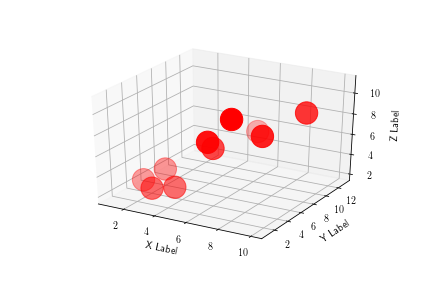

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o', s=500)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [73]:
?ax.scatter

<IPython.core.display.Javascript object>


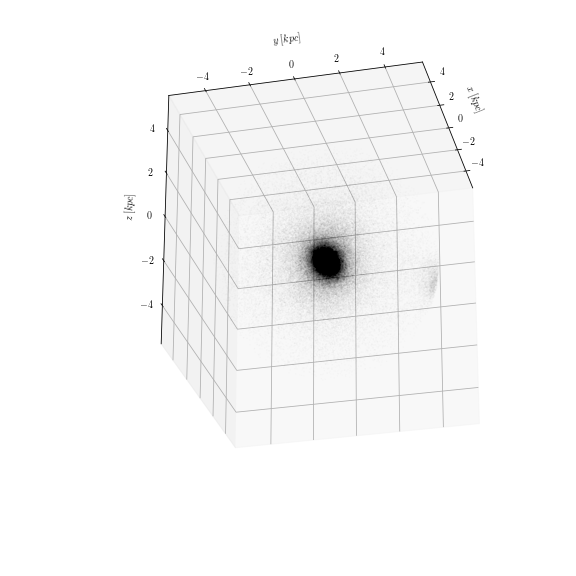

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import time_conversion as tiempo
import math
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')

aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(302,301,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    #print isnap
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    #aexp = snap['subhalo_000/Time'].value

    pstr = snap['subhalo_000/Str/Coordinates'].value
    #IDs = snap['subhalo_000/Str/Ids'].value
    masa_str = snap['subhalo_000/Str/Masses'].value
    vel  = snap['subhalo_000/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    t = tiempo.conv(z, h, omega_lambda, omega_matter)
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp/h
    ystr = (pstr[:,1]-cm[1])*aexp/h
    zstr = (pstr[:,2]-cm[2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    masa_str = masa_str/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((masa_str[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    M90 = Mc_str[noventa]                

    #------------------masa total en r200 (Mvir)--------------------------         
    corte,=np.where(r<r90[-1])
    veloc,=np.where(r<r50[-1])

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

    ##posiciones de partículas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    lim = np.where(r<5)
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(xn[lim], yn[lim], zn[lim], '.', c='k', s=0.0001)
    ax.set_xlabel(r'$x\:[kpc]$')
    ax.set_ylabel(r'$y\:[kpc]$')
    ax.set_zlabel(r'$z\:[kpc]$')
    plt.show()

In [3]:
print len(xn[lim])

319126
